# 시각화

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

def bar_chart(feature):
    yes = train[train['voted']==1][feature].value_counts()
    no = train[train['voted']==2][feature].value_counts()
    df = pd.DataFrame([yes,no])
    df.index = ['Yes','No']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [107]:
import pandas as pd

train=pd.read_csv('./train.csv')
test=pd.read_csv('./test_x.csv')

# 데이터 전처리

In [108]:
import numpy as np
train['trust']=1
test['trust']=1

family_drop_score=10

train['trust']=np.where(train['familysize'] >= family_drop_score, 0, train['trust'])
test['trust']=np.where(test['familysize'] >= family_drop_score, 0, test['trust'])

train['familysize']=np.where(train['familysize'] >= family_drop_score, family_drop_score, train['familysize'])
test['familysize']=np.where(test['familysize'] >= family_drop_score, family_drop_score, test['familysize'])

train['trust']=np.where(train['education'] == 0, 0, train['trust'])
train['education']=np.where(train['education'] == 0, 2, train['education'])
test['trust']=np.where(test['education'] == 0, 0, test['trust'])
test['education']=np.where(test['education'] == 0, 2, test['education'])

train['urban']=train['urban'].astype('str')
test['urban']=test['urban'].astype('str')

train['education']=train['education'].astype('str')
test['education']=test['education'].astype('str')


In [109]:
time = ['QaE', 'QbE', 'QcE', 'QdE', 'QeE','QfE', 'QgE', 'QhE', 'QiE', 'QjE', 'QkE', 'QlE', 'QmE', 'QnE', 'QoE', 'QpE', 'QqE', 'QrE', 'QsE', 'QtE']

train[time] = np.where(train[time] > 10000, 10000, train[time])
test[time] = np.where(test[time] > 10000, 10000, test[time])

# train[time] = np.where(train[time] > 10000, train[time].median(), train[time])
# test[time] = np.where(test[time] > 10000, test[time].median(), test[time])

P_time=['QbE', 'QcE', 'QhE', 'QjE', 'QmE', 'QoE', 'QpE', 'QsE', 'QtE']
N_time=['QaE', 'QdE', 'QeE', 'QfE', 'QgE', 'QiE', 'QkE', 'QlE', 'QnE', 'QqE', 'QrE']

train['p_time']=train[P_time].sum(axis=1)
test['p_time']=test[P_time].sum(axis=1)
train['n_time']=train[N_time].sum(axis=1)
test['n_time']=test[N_time].sum(axis=1)

# 원핫 인코딩 (gender, race, religion)

In [110]:
train=pd.get_dummies(train, columns=['race'])
train=pd.get_dummies(train, columns=['religion'])
train=pd.get_dummies(train, columns=['gender'])
train=pd.get_dummies(train, columns=['urban'])
train=pd.get_dummies(train, columns=['education'])
# train=pd.get_dummies(train, columns=['age_group'])
train=pd.get_dummies(train, columns=['hand'])

test=pd.get_dummies(test, columns=['race'])
test=pd.get_dummies(test, columns=['religion'])
test=pd.get_dummies(test, columns=['gender'])
test=pd.get_dummies(test, columns=['urban'])
test=pd.get_dummies(test, columns=['education'])
# test=pd.get_dummies(test, columns=['age_group'])
test=pd.get_dummies(test, columns=['hand'])

# Feature : Mach_score (마키아벨리니즘 스코어)

In [111]:
Answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

In [112]:
reverse = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for r in reverse: 
        train[r] = 6 - train[r]
        test[r] = 6 - test[r]

In [113]:
reverse = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for r in reverse: 
        train[r] = 6 - train[r]
        test[r] = 6 - test[r]

In [114]:
train['Mach_score'] = train[Answers].mean(axis = 1)
test['Mach_score'] = test[Answers].mean(axis = 1)

# Feature : tp0106, tp0207, tp0308, tp0409, tp0510 (관련있는 tp 끼리 묶음)

In [115]:
Tp = ['tp01', 'tp02', 'tp03', 'tp04', 'tp05',
             'tp06', 'tp07', 'tp08', 'tp09', 'tp10']

In [116]:
reverse = ["tp06", "tp07", "tp08", "tp09", "tp10"]
for r in reverse: 
        train[r] = 7 - train[r]
        test[r] = 7 - test[r]
        
tp0106=['tp01', 'tp06']
tp0207=['tp02', 'tp07']
tp0308=['tp03', 'tp08']
tp0409=['tp04', 'tp09']
tp0510=['tp05', 'tp10']
train['tp0106'] = train[tp0106].sum(axis = 1)
train['tp0207'] = train[tp0207].sum(axis = 1)
train['tp0308'] = train[tp0308].sum(axis = 1)
train['tp0409'] = train[tp0409].sum(axis = 1)
train['tp0510'] = train[tp0510].sum(axis = 1)
temp=['tp0106', 'tp0207', 'tp0308','tp0409', 'tp0510']

test['tp0106'] = test[tp0106].sum(axis = 1)
test['tp0207'] = test[tp0207].sum(axis = 1)
test['tp0308'] = test[tp0308].sum(axis = 1)
test['tp0409'] = test[tp0409].sum(axis = 1)
test['tp0510'] = test[tp0510].sum(axis = 1)

In [117]:
train[temp].describe()

,tp0106,tp0207,tp0308,tp0409,tp0510
count,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000
mean,7.545023,7.590090,5.261486,7.763749,4.017921
std,3.509913,2.916658,3.043976,3.366161,2.473560
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,6.000000,3.000000,5.000000,2.000000
50%,8.000000,8.000000,5.000000,8.000000,4.000000
75%,11.000000,10.000000,7.000000,11.000000,6.000000
max,14.000000,14.000000,14.000000,14.000000,14.000000


In [118]:
tp_drop_score=12

train['trust']=np.where(train['tp0106'] >= tp_drop_score, 0, train['trust'])
train['trust']=np.where(train['tp0207'] >= tp_drop_score, 0, train['trust'])
train['trust']=np.where(train['tp0308'] >= tp_drop_score, 0, train['trust'])
train['trust']=np.where(train['tp0409'] >= tp_drop_score, 0, train['trust'])
train['trust']=np.where(train['tp0510'] >= tp_drop_score, 0, train['trust'])

test['trust']=np.where(test['tp0106'] >= tp_drop_score, 0, test['trust'])
test['trust']=np.where(test['tp0207'] >= tp_drop_score, 0, test['trust'])
test['trust']=np.where(test['tp0308'] >= tp_drop_score, 0, test['trust'])
test['trust']=np.where(test['tp0409'] >= tp_drop_score, 0, test['trust'])
test['trust']=np.where(test['tp0510'] >= tp_drop_score, 0, test['trust'])

train['tp0106']=np.where(train['tp0106'] >= tp_drop_score, tp_drop_score, train['tp0106'])
train['tp0207']=np.where(train['tp0207'] >= tp_drop_score, tp_drop_score, train['tp0207'])
train['tp0308']=np.where(train['tp0308'] >= tp_drop_score, tp_drop_score, train['tp0308'])
train['tp0409']=np.where(train['tp0409'] >= tp_drop_score, tp_drop_score, train['tp0409'])
train['tp0510']=np.where(train['tp0510'] >= tp_drop_score, tp_drop_score, train['tp0510'])

test['tp0106']=np.where(test['tp0106'] >= tp_drop_score, tp_drop_score, test['tp0106'])
test['tp0207']=np.where(test['tp0207'] >= tp_drop_score, tp_drop_score, test['tp0207'])
test['tp0308']=np.where(test['tp0308'] >= tp_drop_score, tp_drop_score, test['tp0308'])
test['tp0409']=np.where(test['tp0409'] >= tp_drop_score, tp_drop_score, test['tp0409'])
test['tp0510']=np.where(test['tp0510'] >= tp_drop_score, tp_drop_score, test['tp0510'])

<AxesSubplot:>

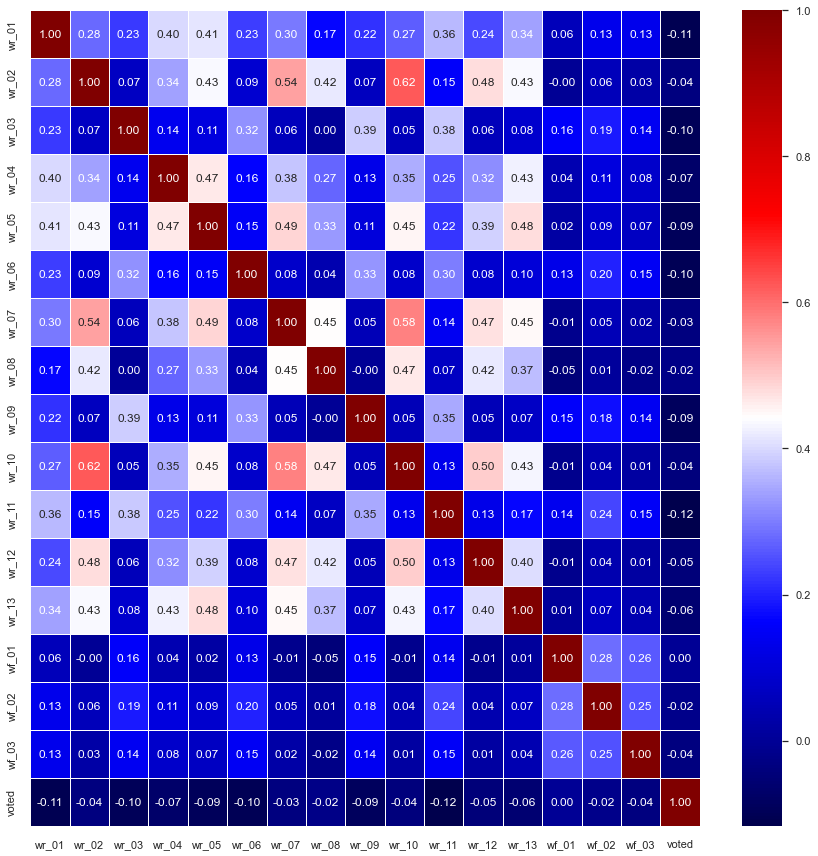

In [119]:
wr_voted=['wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10','wr_11', 'wr_12', 'wr_13',
     'wf_01', 'wf_02', 'wf_03', 'voted']
plt.figure(figsize=(15,15))
sns.heatmap(data = train[wr_voted].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='seismic')

# wr에서 가져갈 feature : 1, 3, 5, 6, 9, 11

# wf_(1~3) : 설문자의 어휘 능력 (허구인 단어의 정의를 앎)

In [120]:
wf=['wf_01', 'wf_02', 'wf_03']

train['wf']=train[wf].mean(axis=1)
train['trust']= np.where(train['wf'] >= 0.0, 0, train['trust'])

test['wf']=test[wf].mean(axis=1)
test['trust']= np.where(test['wf'] >= 0.0, 0, test['trust'])

In [121]:
train['is10s']=(train['age_group']=='10s')
test['is10s']=(test['age_group']=='10s')

# drop 할 feature들

In [122]:
drop_feature=[
#                 'engnat',
    
#                 'familysize',
    
#                 'married',
    
#                 'race_Arab', 'race_Asian','race_Black','race_Indigenous Australian','race_Native American','race_Other','race_White',               
    
#                 'religion_Agnostic','religion_Atheist', 'religion_Buddhist','religion_Christian_Catholic','religion_Christian_Mormon', 
#                 'religion_Christian_Other', 'religion_Christian_Protestant', 'religion_Hindu','religion_Jewish','religion_Muslim', 
#                 'religion_Other','religion_Sikh',
    
#                 'gender_Female','gender_Male',
                
#                 'urban_0','urban_1','urban_2','urban_3',
    
#                 'education_1', 'education_2', 'education_3', 'education_4, '
    
#                 'trust',
                
                'age_group',
                
                'QaA', 'QbA', 'QcA', 'QdA', 'QeA','QfA', 'QgA', 'QhA', 'QiA', 'QjA', 'QkA', 'QlA', 'QmA', 'QnA', 'QoA','QpA', 
                'QqA', 'QrA', 'QsA', 'QtA',
                
                'QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QjE', 'QkE', 'QlE','QmE', 'QnE', 'QoE', 'QpE', 
                'QqE', 'QrE', 'QsE', 'QtE',
    
#                 'p_time' , 

#                 'n_time',
              
                'tp01', 'tp02', 'tp03', 'tp04', 'tp05','tp06','tp07', 'tp08', 'tp09', 'tp10',
              
#                 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07', 'wr_08', 'wr_09','wr_10','wr_11', 'wr_12', 'wr_13', 
                'wr_02',  'wr_04', 'wr_07', 'wr_08', 'wr_10', 'wr_12', 'wr_13', 
                'wf_01', 'wf_02', 'wf_03', 'wf',
              
                'hand_0','hand_1','hand_2','hand_3',
              
              ]

train = train.drop(drop_feature, axis = 1)
test = test.drop(drop_feature, axis = 1)

# Model 생성

In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# 사용한 feature 목록

In [124]:
for i in train:
    print(i)


index
engnat
familysize
married
voted
wr_01
wr_03
wr_05
wr_06
wr_09
wr_11
trust
p_time
n_time
race_Arab
race_Asian
race_Black
race_Indigenous Australian
race_Native American
race_Other
race_White
religion_Agnostic
religion_Atheist
religion_Buddhist
religion_Christian_Catholic
religion_Christian_Mormon
religion_Christian_Other
religion_Christian_Protestant
religion_Hindu
religion_Jewish
religion_Muslim
religion_Other
religion_Sikh
gender_Female
gender_Male
urban_0
urban_1
urban_2
urban_3
education_1
education_2
education_3
education_4
Mach_score
tp0106
tp0207
tp0308
tp0409
tp0510
is10s


# Auto ML

In [125]:
from pycaret.classification import *
clf = setup(data = train, target = 'voted',ignore_features=['index'])

,Description,Value
0,Session id,6505
1,Target,voted
2,Target type,Binary
3,Target mapping,"1: 0, 2: 1"
4,Original data shape,"(45532, 49)"
5,Transformed data shape,"(45532, 48)"
6,Transformed train set shape,"(31872, 48)"
7,Transformed test set shape,"(13660, 48)"
8,Ignore features,1
9,Numeric features,47


# 모델 학습 및 비교 (Train models and compare)

In [126]:
best_3 = compare_models(sort = 'AUC', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6954,0.7660,0.6383,0.7657,0.6962,0.3958,0.4025,0.0730
gbc,Gradient Boosting Classifier,0.6946,0.7646,0.6370,0.7653,0.6952,0.3943,0.4011,0.6650
rf,Random Forest Classifier,0.6909,0.7594,0.6445,0.7545,0.6951,0.3855,0.3905,0.3390
ada,Ada Boost Classifier,0.6897,0.7572,0.6473,0.7509,0.6952,0.3827,0.3871,0.2660
lda,Linear Discriminant Analysis,0.6881,0.7568,0.6418,0.7517,0.6924,0.3801,0.3850,0.0840
et,Extra Trees Classifier,0.6884,0.7549,0.6515,0.7465,0.6957,0.3794,0.3831,0.3580
nb,Naive Bayes,0.6839,0.7472,0.6136,0.7621,0.6798,0.3748,0.3835,0.0330
lr,Logistic Regression,0.6732,0.7429,0.7052,0.6997,0.7024,0.3401,0.3402,0.3340
qda,Quadratic Discriminant Analysis,0.6622,0.7234,0.5489,0.7686,0.6389,0.3381,0.3559,0.0390
dt,Decision Tree Classifier,0.6130,0.6098,0.6438,0.6468,0.6453,0.2194,0.2195,0.0590


In [127]:
tuned_best_3=[tune_model(i, fold=10, round=4, n_iter=10, custom_grid = None, optimize = 'AUC', choose_better = True, verbose = False) for i in best_3]

# 모델 앙상블 (Model Ensemble)

In [128]:
blender_best3 = blend_models(estimator_list = tuned_best_3, fold = 5, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7027,0.7719,0.6449,0.7738,0.7035,0.4104,0.4173
1,0.6900,0.7681,0.6297,0.7622,0.6896,0.3856,0.3927
2,0.6963,0.7673,0.6341,0.7698,0.6954,0.3981,0.4056
3,0.6939,0.7574,0.6359,0.7647,0.6943,0.3930,0.3997
4,0.6933,0.7671,0.6288,0.7683,0.6916,0.3925,0.4004
Mean,0.6952,0.7664,0.6347,0.7677,0.6949,0.3959,0.4031
Std,0.0042,0.0048,0.0057,0.0041,0.0048,0.0082,0.0082


# 모델 예측 (Prediction)

In [129]:
pred_holdout = predict_model(blender_best3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.6961,0.7654,0,0,0,0.3977,0.4051


# 전체 데이터에 대한 재학습 (Re-training the model on whole data)

In [130]:
final_model = finalize_model(blender_best3)

In [131]:
pred_holdout = predict_model(final_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7165,0.7927,0,0,0,0.4384,0.4469


# 대회용 test set에 대한 예측 (Predicting on test set for the competition)

In [132]:
print("train :",train.shape)
print("test :",test.shape)

train : (45532, 50)
test : (11383, 49)


In [133]:
predictions = predict_model(final_model, data = test)
predictions

,engnat,familysize,married,wr_01,wr_03,wr_05,wr_06,wr_09,wr_11,p_time,...,education_4,Mach_score,tp0106,tp0207,tp0308,tp0409,tp0510,is10s,Label,Score
0,2.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,29074.0,...,0.0,2.45,7.0,6.0,5.0,7.0,4.0,1.0,2,0.6321
1,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15497.0,...,0.0,2.80,7.0,7.0,7.0,7.0,7.0,1.0,2,0.7750
2,2.0,7.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,10899.0,...,0.0,3.55,12.0,7.0,8.0,3.0,12.0,0.0,1,0.5395
3,1.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,12223.0,...,1.0,3.35,1.0,12.0,3.0,12.0,1.0,0.0,1,0.7049
4,1.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,8982.0,...,0.0,2.90,12.0,3.0,7.0,5.0,7.0,1.0,2,0.6797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,2.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,8368.0,...,0.0,3.20,4.0,6.0,7.0,6.0,2.0,0.0,1,0.5020
11379,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6097.0,...,0.0,4.55,3.0,7.0,9.0,1.0,3.0,1.0,2,0.7769
11380,1.0,4.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,7994.0,...,1.0,3.15,9.0,8.0,2.0,12.0,3.0,0.0,1,0.6681
11381,1.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,22938.0,...,0.0,3.05,9.0,12.0,2.0,12.0,2.0,0.0,1,0.6144


In [134]:
submission= pd.read_csv('./sample_submission.csv')

In [135]:
submission['voted'] = predictions['Label']

In [136]:
submission.to_csv('submission_proba.csv', index = False)

In [137]:
submission['voted'].describe()

count    11383.000000
mean         1.453483
std          0.497853
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: voted, dtype: float64

In [138]:
submission['voted']

0        2
1        2
2        1
3        1
4        2
        ..
11378    1
11379    2
11380    1
11381    1
11382    2
Name: voted, Length: 11383, dtype: int8

In [139]:
submission['voted'].value_counts()

1    6221
2    5162
Name: voted, dtype: int64

# TEST Set에 대한 AUC

In [140]:
from pycaret.utils import check_metric
check_metric(pred_holdout['voted'], pred_holdout['Label'], metric='AUC')

0.7233